In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


In [21]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape


(88883, 85)

In [22]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', None)

In [23]:
data_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


                                                           მონაცემთა დამუშავება 

                                                ზრდა-კლების მიხედვით დალაგების ფუნქცია 

In [24]:
def sort_dict_by_value(Dictionary, reverse = False):        # ალაგებს ზრდის-კლების მიხედვით 
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

                                                         გრაფიკის აგების ფუნქცია    

In [25]:

def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

                                                        სიების სორტირების ფუქნცია

In [26]:
def list_sorter_counter(filtered_list):
  
  global key_Phrases    # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  global Quantity       # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  

  union = []                          # ერთი დიდი სია 

  for i in filtered_list:
      for k in i :                    # ერთ დიდი სიაში აერთიანებს ყველაფერს 
          union.append(k)

  Counted = Counter(union)             # დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება



  Counted = sort_dict_by_value(Counted, False)  #იყენებს ძემოთა ფუქნციას


  key_Phrases = []  #ინახავს ფრაზებს
  Quantity = []   # ინახავს რაოდენობას 

  

  items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად


  for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
      key_Phrases.append(item[0])   # უშვებს ფრაზებს
      Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს


                                                            მონაცემთა დამუშავება

                                                                Developer Type      

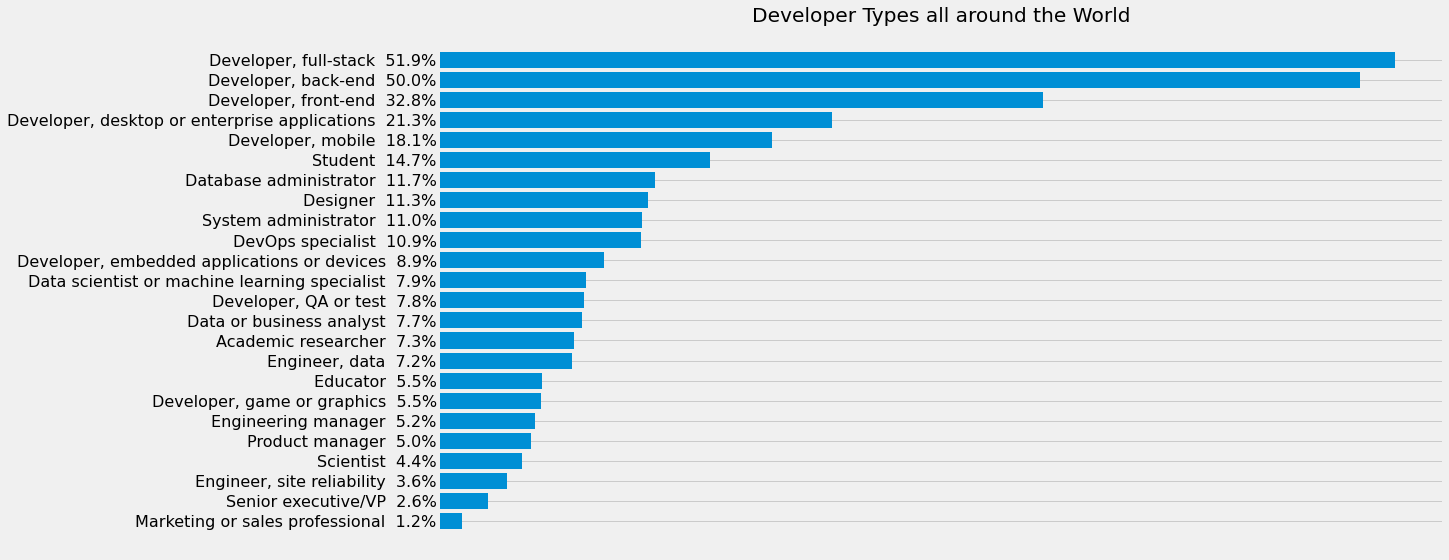

In [27]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType.dropna( inplace=True)   # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType = DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(DevType)  # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types all around the World") # ვაგებთ გრაფიკს


                                                                    OpenSourcer

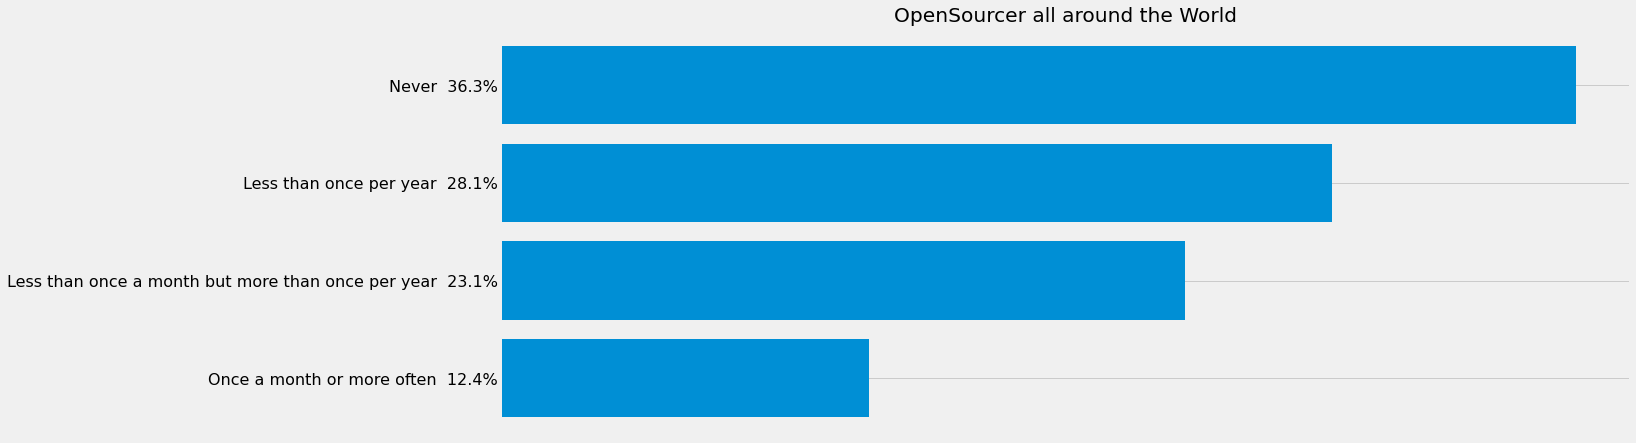

In [28]:
OpenSourcer = data["OpenSourcer"]  # ვიხებთ მხოლოდ OpenSourcer-ის ინფოს

counted = Counter(OpenSourcer)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით OpenSourcer-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


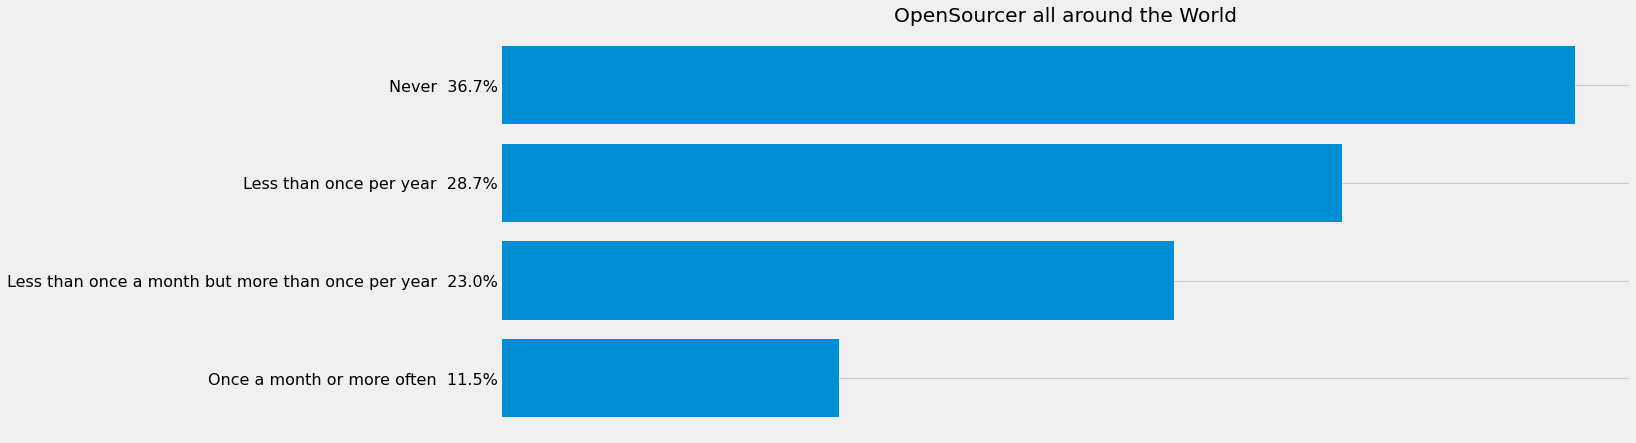

In [29]:
OpenSourcer_USA = data["OpenSourcer"]

OpenSourcer_USA.dropna(inplace = True)

OpenSourcer = data[(OpenSourcer_USA!= "NaN") & (data["Country"] == "United States")]  


New_Opensourcer = OpenSourcer["OpenSourcer"]

counted = Counter(New_Opensourcer)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Opensourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


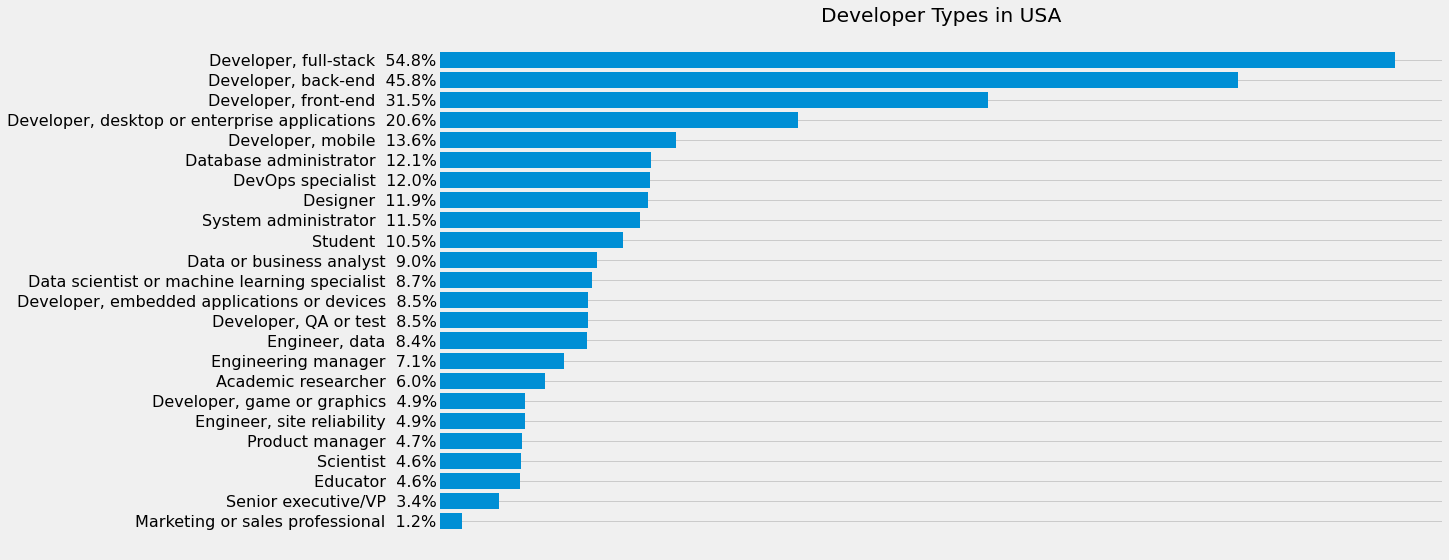

In [30]:
DevType_Filtered = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის USA-სთან



New_DevType = DevType["DevType"]  # ვინაცავთ ახალ ცვლადში

New_DevType = New_DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_DevType)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_DevType ,"fivethirtyeight", False , (16,9), "Developer Types in USA") # ვაგებთ გრაფიკს

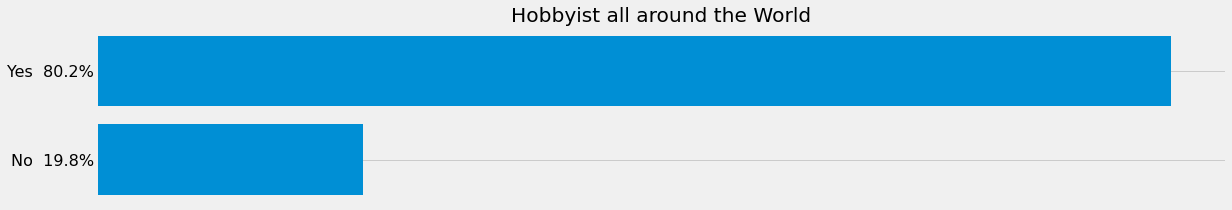

In [31]:
Hobbyist = data["Hobbyist"]

counted = Counter(Hobbyist)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Hobbyist-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,3), "Hobbyist all around the World")   # ვაგებთ გრაფიკს



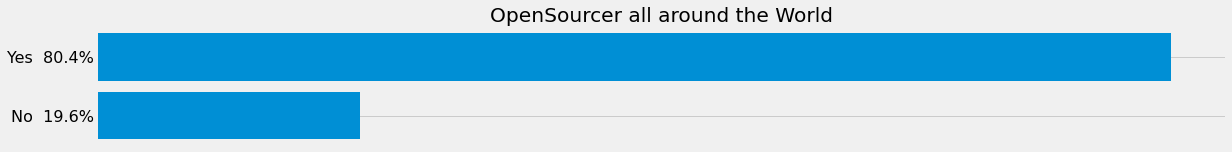

In [32]:
Hobbyist_USA = data["OpenSourcer"]

Hobbyist_USA.dropna(inplace = True)

Hobbyist = data[(Hobbyist_USA != "NaN") & (data["Country"] == "United States")]  


New_Hobbyist= Hobbyist["Hobbyist"]

counted = Counter(New_Hobbyist)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Hobbyist ,"fivethirtyeight", False , (18,2), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


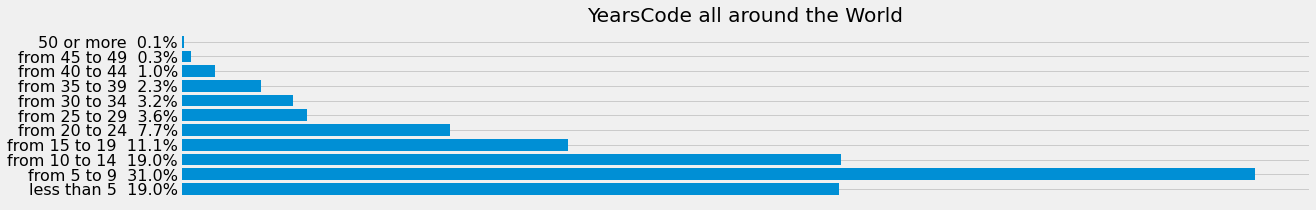

In [70]:
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)

less_than_5 = []
from_5_to_9 = []
from_10_to_14 = []
from_15_to_19 = []
from_20_to_24 = []
from_25_to_29 = []
from_30_to_34 = []
from_35_to_39 = []
from_40_to_44 = []
from_45_to_49 = []
more_than_50 =[]



for i in YearsCode:
    if i in str(list(range(0,5))):
        less_than_5.append(i)
    elif i in str(list(range(5,10))):
        from_5_to_9.append(i)
    elif i in str(list(range(10,15))):
        from_10_to_14.append(i)
    elif i in str(list(range(15,20))):
        from_15_to_19.append(i)
    elif i in str(list(range(20,25))):
        from_20_to_24.append(i)
    elif i in str(list(range(25,30))):
        from_25_to_29.append(i)
    elif i in str(list(range(30,35))):
        from_30_to_34.append(i)
    elif i in str(list(range(35,40))):
        from_35_to_39 .append(i)
    elif i in str(list(range(40,45))):
        from_40_to_44.append(i)
    elif i in str(list(range(45,50))):
        from_45_to_49.append(i)
    elif i in str(list(range(50,100))):
        more_than_50.append(i)
        


YearsCode = np.array(YearsCode)
YearsCode = np.where(YearsCode == 'Less than 1 year', '1', YearsCode)

YearsCode = np.array(YearsCode)
YearsCode = np.where(YearsCode == 'More than 50 years', '50', YearsCode)




len_less_than_5 = len(less_than_5)
len_from_5_to_9 = len(from_5_to_9)
len_from_10_to_14 = len(from_10_to_14)
len_from_15_to_19 = len(from_15_to_19) 
len_from_20_to_24 = len(from_20_to_24)
len_from_25_to_29 = len(from_25_to_29)
len_from_30_to_34 = len(from_30_to_34)
len_from_35_to_39 = len(from_35_to_39)
len_from_40_to_44 = len(from_40_to_44)
len_from_45_to_49 = len(from_45_to_49)
len_more_than_50 = len(more_than_50)

key_Phrases= ["less than 5", "from 5 to 9", "from 10 to 14", "from 15 to 19", "from 20 to 24", "from 25 to 29", "from 30 to 34", "from 35 to 39", "from 40 to 44", "from 45 to 49", "50 or more"]
Quantity = [len_less_than_5, len_from_5_to_9, len_from_10_to_14, len_from_15_to_19, len_from_20_to_24, len_from_25_to_29, len_from_30_to_34, len_from_35_to_39, len_from_40_to_44, len_from_45_to_49, len_more_than_50]


Build_Barh_sizes( key_Phrases , Quantity, YearsCode, "fivethirtyeight", False , (18,3), "YearsCode all around the World")   # ვაგებთ გრაფიკს